<a href="https://colab.research.google.com/github/Ibocan1999/IE423/blob/main/task_1REV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

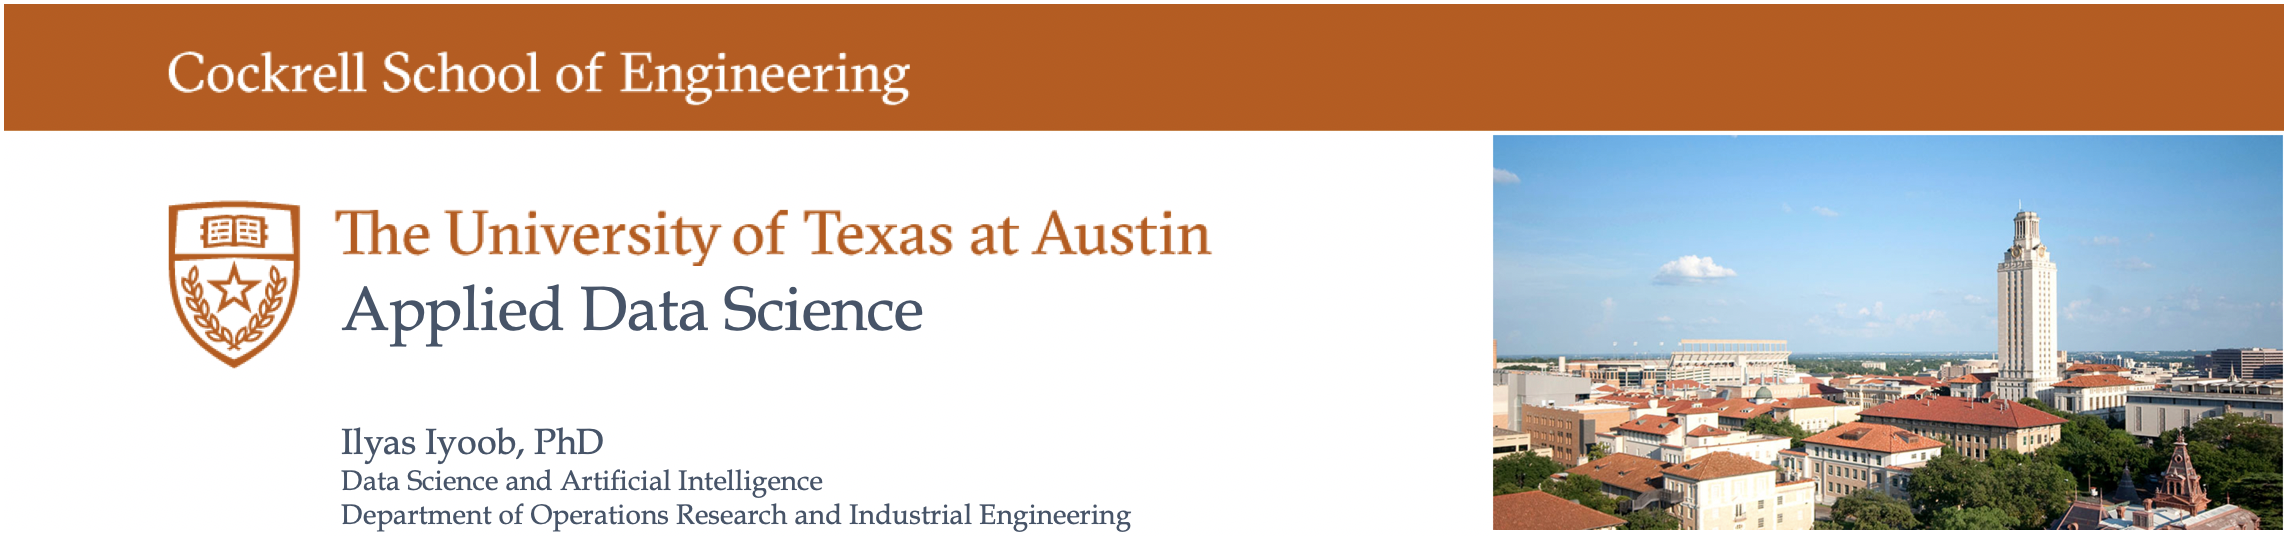

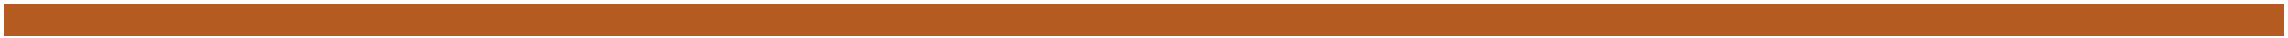

## <font color='#475468'> Restaurant Tips:</font>
### <font color='#475468'> Can you predict tip amount based on guest information?</font>

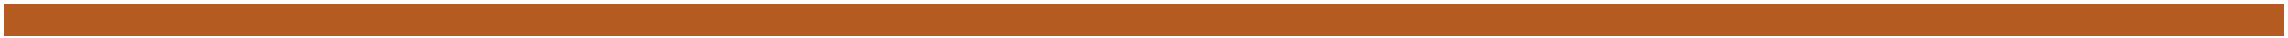

## Initialize

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IE-423/final_data.csv')

In [ ]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [ ]:
df.describe(include='all')

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754,10754,10754,10754,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,...,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
unique,10754,374,10584,16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,46,6,1821,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,...,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,NaN,NaN,NaN,NaN,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,...,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,NaN,NaN,NaN,NaN,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,...,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,...,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,NaN,NaN,NaN,NaN,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,...,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000


## Fit a Regression Model to Predict Tip

In [ ]:
features = [
    'age', 'appearance', 'goals', 'assists', 'yellow cards',
    'red cards', 'goals conceded', 'clean sheets', 'minutes played',
    'days_injured', 'games_injured', 'award', 'highest_value',
    'position_encoded', 'winger'
]


X = df[features]
Y = df['current_value']


print(X.head())
print(Y.head())



    age  appearance     goals   assists  yellow cards  red cards  \
0  32.0         104  0.000000  0.000000      0.009585        0.0   
1  30.0          15  0.000000  0.000000      0.069018        0.0   
2  37.0           4  0.000000  0.000000      0.000000        0.0   
3  25.0          82  0.028090  0.056180      0.224719        0.0   
4  30.0          63  0.017889  0.017889      0.053667        0.0   

   goals conceded  clean sheets  minutes played  days_injured  games_injured  \
0        1.217252      0.335463            9390            42              5   
1        1.242331      0.207055            1304           510             58   
2        0.616438      0.924658             292           697             84   
3        0.000000      0.000000            6408           175             22   
4        0.000000      0.000000            5031           238             51   

   award  highest_value  position_encoded  winger  
0     13       70000000                 1       0  
1     

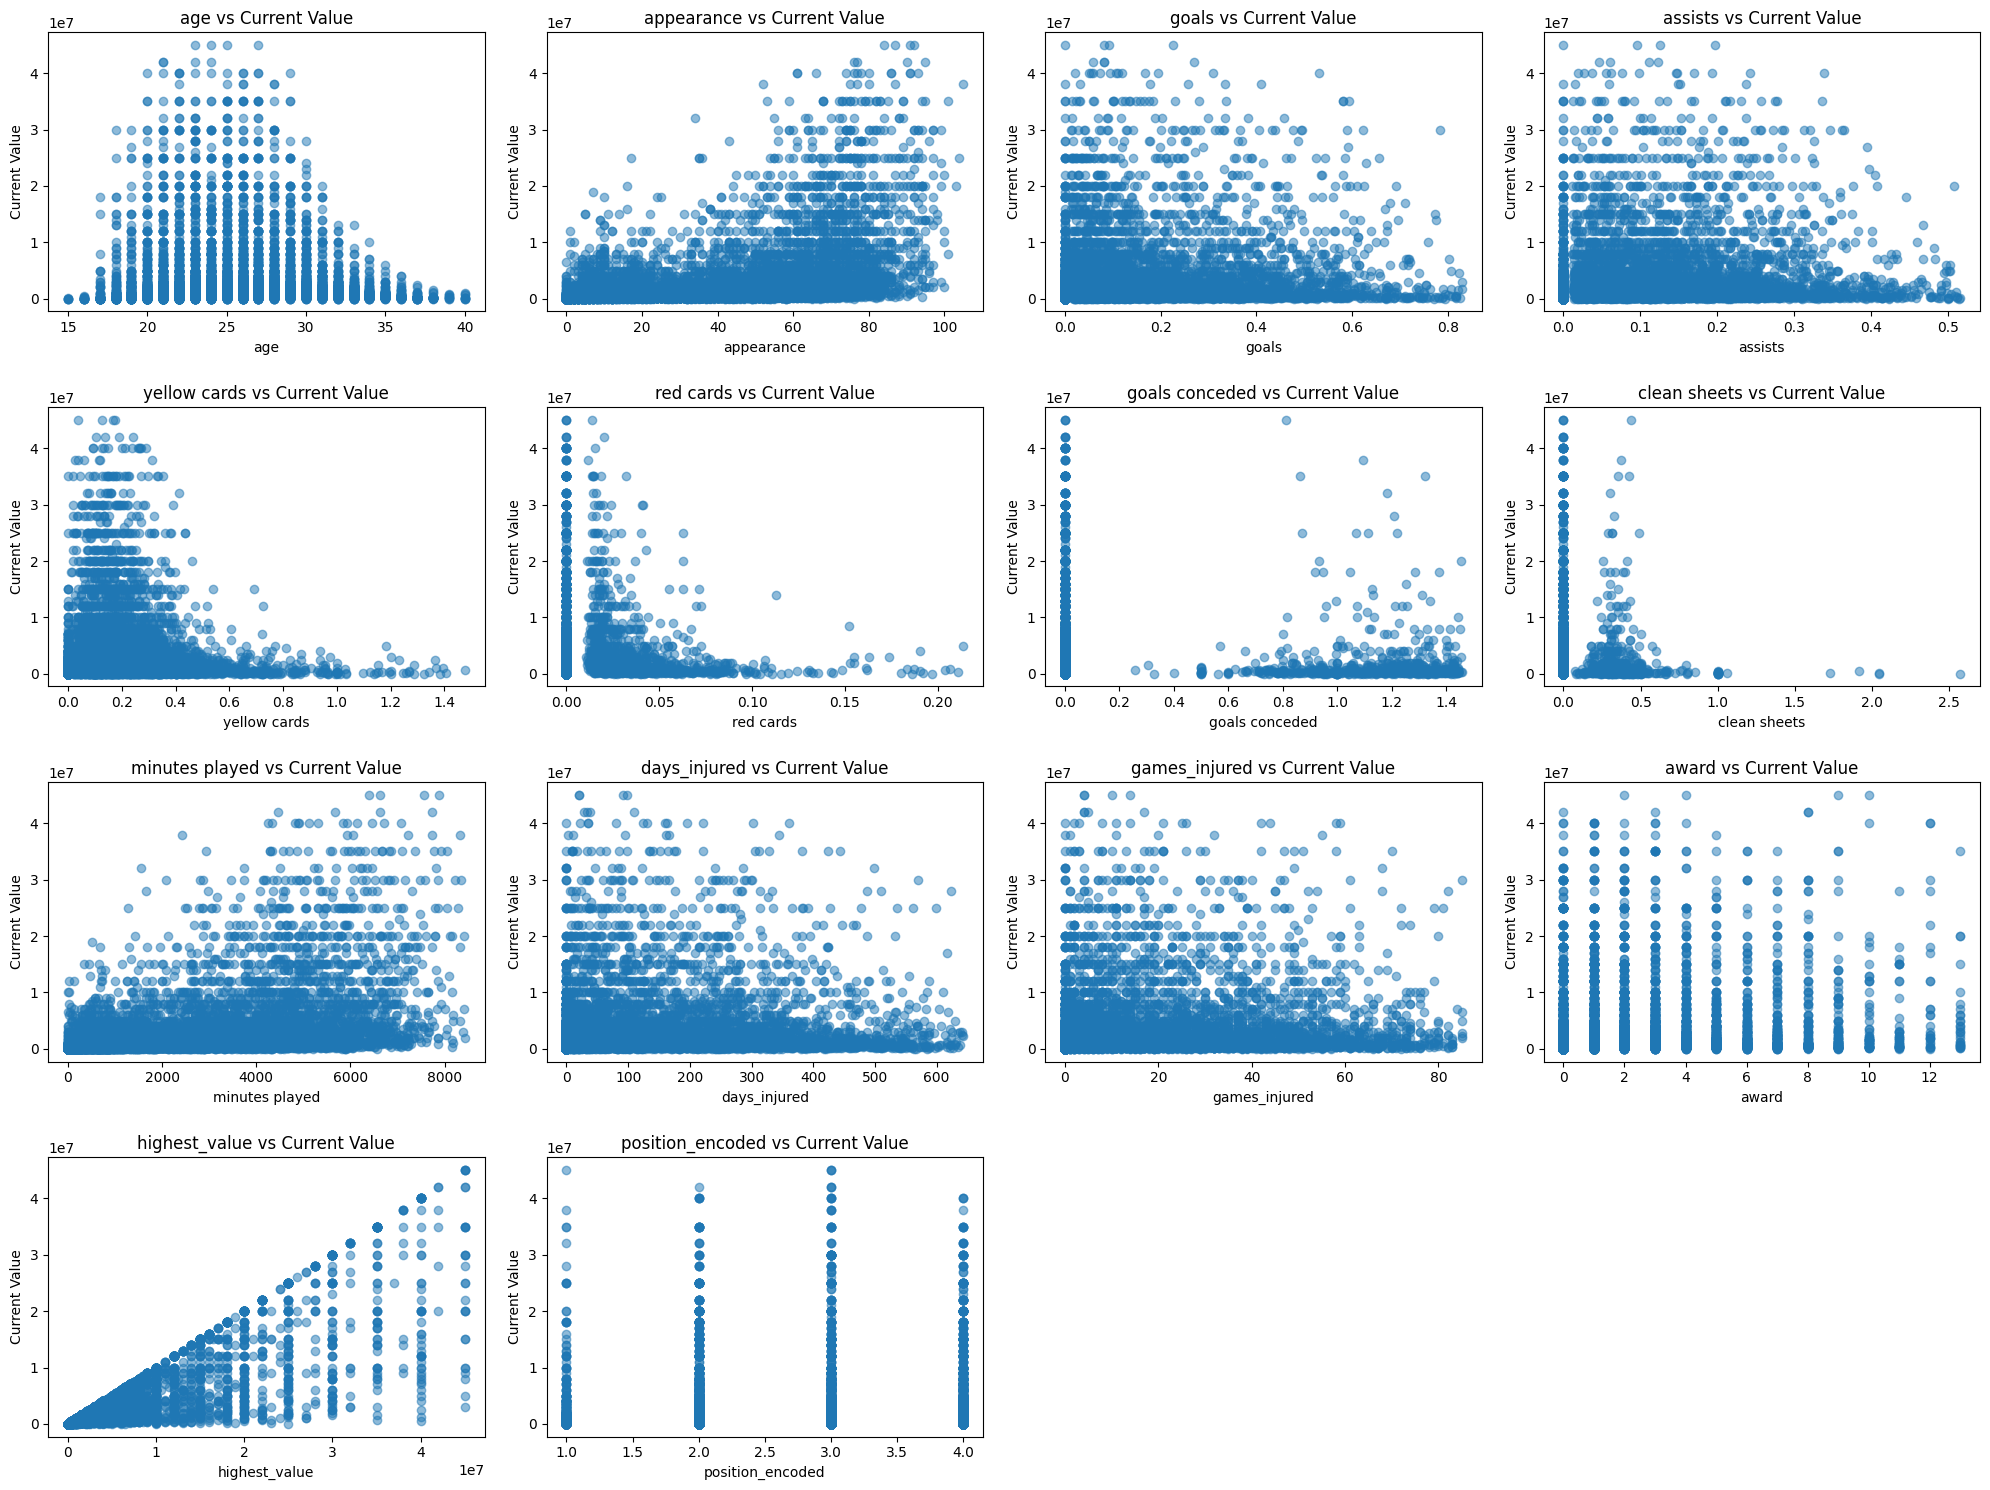

In [ ]:
X = df[features]
Y = df['current_value']


z_scores = np.abs(stats.zscore(X))


threshold = 3
outliers = (z_scores > threshold).any(axis=1)


X_clean = X[~outliers]
Y_clean = Y[~outliers]


plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)
    plt.scatter(X_clean[feature], Y_clean, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Current Value')
    plt.title(f'{feature} vs Current Value')

plt.tight_layout()
plt.show()

data = X_clean.copy()
data['current_value'] = Y_clean


sns.pairplot(data)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 22313943674324.97
R-squared: 0.7532590267058291


In [ ]:
from sklearn.linear_model import LinearRegression

# Fit linear regression model - aka train model
regr = LinearRegression()
regr.fit(X, Y)

# Display regression model
print('Intercept:', regr.intercept_)
print('Coefficients:', regr.coef_)


Intercept: 5432578.548570052
Coefficients: [-2.17900622e+05 -5.13294679e+04  7.91087579e+05  1.13998838e+06
  7.25545920e+04 -1.80988216e+05 -2.84655490e+05  3.15893136e+04
  1.16535820e+03  4.20723552e+03 -4.93137445e+04 -3.33079993e+05
  6.05801989e-01 -3.37644363e+04 -6.18313865e+04]


In [ ]:
coefficients = pd.DataFrame(regr.coef_, features, columns=['Coefficient'])
print(coefficients)


                   Coefficient
age              -2.179006e+05
appearance       -5.132947e+04
goals             7.910876e+05
assists           1.139988e+06
yellow cards      7.255459e+04
red cards        -1.809882e+05
goals conceded   -2.846555e+05
clean sheets      3.158931e+04
minutes played    1.165358e+03
days_injured      4.207236e+03
games_injured    -4.931374e+04
award            -3.330800e+05
highest_value     6.058020e-01
position_encoded -3.376444e+04
winger           -6.183139e+04


In [ ]:
from scipy import stats
import numpy as np


z_scores = np.abs(stats.zscore(X))


threshold = 3
outliers = (z_scores > threshold).any(axis=1)

print(f'Number of outliers detected: {np.sum(outliers)}')


X_clean = X[~outliers]
Y_clean = Y[~outliers]


Number of outliers detected: 1258


In [ ]:
X = df[features]
Y = df[['current_value']]


z_scores = np.abs(stats.zscore(X))


threshold = 3
filtered_entries = (z_scores < threshold).all(axis=1)


X_clean = X[filtered_entries]
Y_clean = Y[filtered_entries]


X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, Y_clean, test_size=0.2, random_state=42)

regr_clean = LinearRegression()
regr_clean.fit(X_train_clean, y_train_clean)


y_pred_clean = regr_clean.predict(X_test_clean)


mse_clean = mean_squared_error(y_test_clean, y_pred_clean)
r2_clean = r2_score(y_test_clean, y_pred_clean)

print(f'Cleaned Mean Squared Error: {mse_clean}')
print(f'Cleaned R-squared: {r2_clean}')

Cleaned Mean Squared Error: 7023416239154.526
Cleaned R-squared: 0.7489081914741029


utexas_ds_orie_divider_gray.png

In [ ]:
## Prediction
# Example values for new prediction
new_age = 25
new_appearance = 30
new_goals = 10
new_assists = 5
new_yellow_cards = 2
new_red_cards = 0
new_goals_conceded = 0
new_clean_sheets = 0
new_minutes_played = 2700
new_days_injured = 10
new_games_injured = 2
new_award = 1
new_highest_value = 15000000
new_position_encoded = 3


new_data = pd.DataFrame({
    'age': [new_age],
    'appearance': [new_appearance],
    'goals': [new_goals],
    'assists': [new_assists],
    'yellow cards': [new_yellow_cards],
    'red cards': [new_red_cards],
    'goals conceded': [new_goals_conceded],
    'clean sheets': [new_clean_sheets],
    'minutes played': [new_minutes_played],
    'days_injured': [new_days_injured],
    'games_injured': [new_games_injured],
    'award': [new_award],
    'highest_value': [new_highest_value],
    'position_encoded': [new_position_encoded]
})


predicted_value = regr_clean.predict(new_data)

print(f'Predicted Player Value: {predicted_value[0]}')


Predicted Player Value: [24939923.95843128]


current_value       1.000000
highest_value       0.839019
appearance          0.451152
minutes played      0.444938
award               0.207485
assists             0.187565
games_injured       0.168493
goals               0.157769
days_injured        0.148439
position_encoded    0.064215
yellow cards        0.007206
red cards           0.002344
goals conceded     -0.031077
clean sheets       -0.037780
age                -0.069188
Name: current_value, dtype: float64


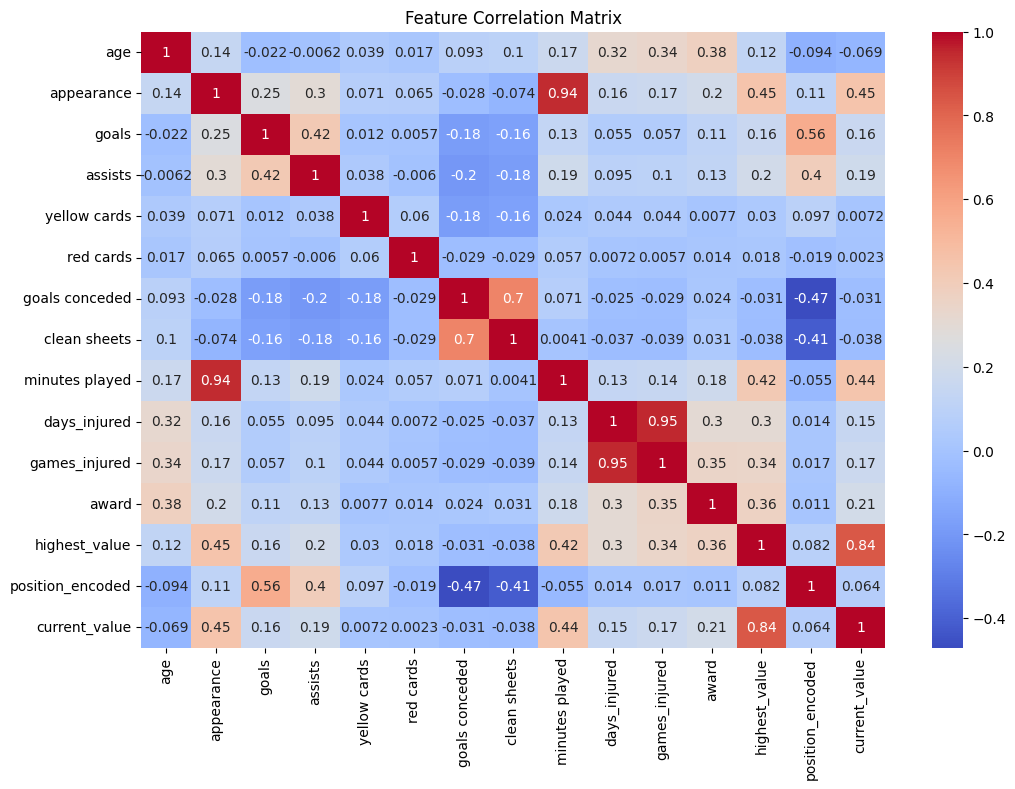

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = X_clean.copy()
corr_matrix['current_value'] = Y_clean
corr = corr_matrix.corr()

print(corr['current_value'].sort_values(ascending=False))


plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()



In [ ]:
## add outliers again
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('/content/drive/MyDrive/IE-423/final_data.csv')


features = [
    'age', 'appearance', 'goals', 'assists', 'yellow cards',
    'red cards', 'goals conceded', 'clean sheets', 'minutes played',
    'days_injured', 'games_injured', 'award', 'highest_value',
    'position_encoded'
]


X = df[features]
Y = df[['current_value']]


z_scores = np.abs(stats.zscore(X))


threshold = 3
filtered_entries = (z_scores < threshold).all(axis=1)


X_clean = X[filtered_entries]
Y_clean = Y[filtered_entries]


X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, Y_clean, test_size=0.2, random_state=42)


regr_clean = LinearRegression()
regr_clean.fit(X_train_clean, y_train_clean)


y_pred_clean = regr_clean.predict(X_test_clean)


mse_clean = mean_squared_error(y_test_clean, y_pred_clean)
r2_clean = r2_score(y_test_clean, y_pred_clean)

print(f'Cleaned Mean Squared Error: {mse_clean}')
print(f'Cleaned R-squared: {r2_clean}')


Cleaned Mean Squared Error: 7023416239154.526
Cleaned R-squared: 0.7489081914741029


In [ ]:
print(df[['name', 'position_encoded']].drop_duplicates().sort_values('position_encoded'))


                     name  position_encoded
0            David de Gea                 1
942       Alexander Meyer                 1
941          Marcel Lotka                 1
940          Gregor Kobel                 1
3343     Danilo Fernandes                 1
...                   ...               ...
5731           João Pedro                 4
5730          Samuel Kalu                 4
5729         Ismaïla Sarr                 4
5756        Iliman Ndiaye                 4
10753  Alexander Badolato                 4

[10708 rows x 2 columns]


In [ ]:
# divide team into 4 area
position_models = {}

for position in df['position_encoded'].unique():

    position_data = df[df['position_encoded'] == position]


    X_position = position_data[features]
    Y_position = position_data[['current_value']]


    if len(X_position) < 5:
        print(f"Warning: Not enough data for position {position}. Skipping...")
        continue


    X_train, X_test, y_train, y_test = train_test_split(X_position, Y_position, test_size=0.2, random_state=42)


    regr = LinearRegression()
    regr.fit(X_train, y_train)


    position_models[position] = regr

    y_pred = regr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Position {position} - Mean Squared Error: {mse}')
    print(f'Position {position} - R-squared: {r2}')


Position 1 - Mean Squared Error: 7035325430026.766
Position 1 - R-squared: 0.6674149837323261
Position 2 - Mean Squared Error: 13284426456269.076
Position 2 - R-squared: 0.7594978903714947
Position 3 - Mean Squared Error: 25987462399177.652
Position 3 - R-squared: 0.7864227100594992
Position 4 - Mean Squared Error: 23072514592970.84
Position 4 - R-squared: 0.7209027376175035


In [ ]:
# Example values for new prediction
new_data = pd.DataFrame({
    'age': [25],
    'appearance': [30],
    'goals': [10],
    'assists': [5],
    'yellow cards': [2],
    'red cards': [0],
    'goals conceded': [0],
    'clean sheets': [0],
    'minutes played': [2700],
    'days_injured': [10],
    'games_injured': [2],
    'award': [1],
    'highest_value': [15000000],
    'position_encoded': [3]
})

# Predict the player's value using the model for their position
position = new_data['position_encoded'][0]
if position in position_models:
    model = position_models[position]
    predicted_value = model.predict(new_data[features])
    print(f'Predicted Player Value for Position {position}: {predicted_value[0]}')
else:
    print(f"No model available for position {position}")


Predicted Player Value for Position 3: [22725820.5592136]


 # Predicted Player Value for Position 3 was [24939923.95843128]
  # After positionly trained [22725820.5592136]

In [ ]:
##Detailed Feature Insights
Highest Value (0.84)
Insight: The strongest positive correlation with current_value. Indicates that players with a higher historical peak value tend to have higher current values.

Goals (0.19) and Assists (0.16)
Insight: Both show a positive correlation, indicating that players who score more goals and provide more assists generally have higher market values.

Appearance (0.45) and Minutes Played (0.44)
Insight: Positive correlations suggest that players who appear in more matches and play more minutes are valued higher, likely due to their reliability and importance to the team.

Awards (0.21)
Insight: Positive correlation with current_value, indicating that winning awards increases a player's market value.

Position Encoded (0.064)
Insight: Slight positive correlation, but not very strong, suggesting positional value has some impact but isn't a major factor.

Negative Correlations
Age (-0.069)
Insight: Slight negative correlation, indicating that older players tend to have slightly lower market values.

Goals Conceded (-0.038)
Insight: For goalkeepers, conceding more goals slightly lowers their market value.

Clean Sheets (-0.038)
Insight: Slight negative correlation with current_value, which is unexpected and might require further investigation.